In [2]:
#Mounting the google drive to colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#import necessary libraries
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2

from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications.vgg16 import VGG16

In [4]:
#Checking the directories in the dataset
print(os.listdir("/content/drive/My Drive/Colab Notebooks/Malaria/Dataset/"))
SIZE=256

['Test', 'Train']


In [5]:
#resizing the training images  and labels
train_images = []
train_labels = [] 
for directory_path in glob.glob("/content/drive/My Drive/Colab Notebooks/Malaria/Dataset/Train/*"):
    label = directory_path.split("\\")[-1]
    #print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        #print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)


In [6]:
#converting into array
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [7]:
#resizing the testing images  and labels
test_images = []
test_labels = [] 
for directory_path in glob.glob("/content/drive/My Drive/Colab Notebooks/Malaria/Dataset/Test/*"):
    fruit_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)

In [8]:
#converting into array
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [9]:
#encoding the data
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [10]:
#splitting the test and training data
x_train, y_train, x_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

In [11]:
#scaling the data
x_train, x_test = x_train / 255.0, x_test / 255.0

In [12]:
#categorizing the data
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)


Accuracy =  0.8880597014925373
Accuracy =  0.7164179104477612
Accuracy =  0.8134328358208955
Accuracy =  0.9104477611940298
Accuracy =  0.7089552238805971


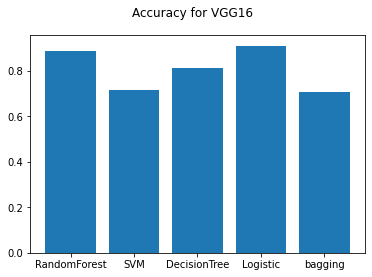

In [114]:
#feature extraction using vgg16
VGG_model = VGG16(weights='imagenet', include_top=False, input_shape=(SIZE, SIZE, 3))

for layer in VGG_model.layers:
	layer.trainable = False
feature_extractor=VGG_model.predict(x_train)
features = feature_extractor.reshape(feature_extractor.shape[0], -1)
X_for_RF = features
X_test_feature = VGG_model.predict(x_test)
X_test_features = X_test_feature.reshape(X_test_feature.shape[0], -1)

from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model.fit(X_for_RF, y_train)
prediction_RF = RF_model.predict(X_test_features)

print("For VGG16 model:")
from sklearn import metrics
acc=metrics.accuracy_score(test_labels_encoded, prediction_RF)
print ("Accuracy for rf = ", acc)
l=[]
l.append(acc)

from sklearn import svm
clf = svm.SVC()
clf.fit(X_for_RF, y_train)
prediction_svm = clf.predict(X_test_features)
acc1=metrics.accuracy_score(test_labels_encoded, prediction_svm)
print ("Accuracy for svm= ", acc1)
l.append(acc1)


from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
clf.fit(X_for_RF, y_train)
prediction_dt = clf.predict(X_test_features)
acc2=metrics.accuracy_score(test_labels_encoded, prediction_dt)
print ("Accuracy for dt= ", acc2)
l.append(acc2)



from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=500)
clf.fit(X_for_RF, y_train)
prediction_lr=clf.predict(X_test_features)
acc3=metrics.accuracy_score(test_labels_encoded, prediction_lr)
print ("Accuracy for lr = ", acc3)
l.append(acc3)

from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10, random_state=0)
clf.fit(X_for_RF, y_train)
prediction_bc=clf.predict(X_test_features)
acc4=metrics.accuracy_score(test_labels_encoded, prediction_bc)
print ("Accuracy for bc= ", acc4)
l.append(acc4)

names = ['RandomForest','SVM','DecisionTree','Logistic','bagging']
plt.bar(names,l)
plt.suptitle('Accuracy for VGG16')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded, prediction_RF))
print(classification_report(test_labels_encoded, prediction_svm))
print(classification_report(test_labels_encoded, prediction_dt))
print(classification_report(test_labels_encoded, prediction_lr))
print(classification_report(test_labels_encoded, prediction_bc))

Accuracy =  0.9402985074626866
Accuracy =  0.9701492537313433
Accuracy =  0.9402985074626866
Accuracy =  0.9477611940298507
Accuracy =  0.9626865671641791


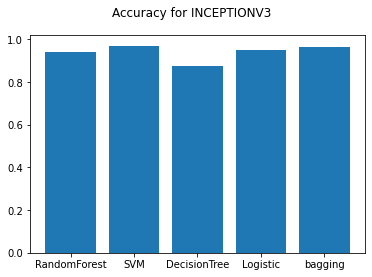

In [126]:
 from tensorflow.keras.applications.inception_v3 import InceptionV3
inc = InceptionV3(input_shape = (SIZE,SIZE, 3), include_top = False, weights = 'imagenet')
for layer in inc.layers:
	layer.trainable = False
feature_extractor2=inc.predict(x_train)
features2 = feature_extractor2.reshape(feature_extractor2.shape[0], -1)
X_for_RF2 = features2
X_test_feature2 = inc.predict(x_test)
X_test_features2 = X_test_feature2.reshape(X_test_feature2.shape[0], -1)

from sklearn.ensemble import RandomForestClassifier
RF_model2 = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model2.fit(X_for_RF2, y_train)
prediction_RF2 = RF_model2.predict(X_test_features2)

print("For INCEPTIONV3 model:")

from sklearn import metrics
acc=metrics.accuracy_score(test_labels_encoded, prediction_RF2)
print ("Accuracy for rf= ", acc)
l=[]
l.append(acc)

from sklearn import svm
clf = svm.SVC()
clf.fit(X_for_RF2, y_train)
prediction_svm2 = clf.predict(X_test_features2)
acc1=metrics.accuracy_score(test_labels_encoded, prediction_svm2)
print ("Accuracy for svm = ", acc1)
l.append(acc1)


from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
clf.fit(X_for_RF2, y_train)
prediction_dt2 = clf.predict(X_test_features2)
acc2=metrics.accuracy_score(test_labels_encoded, prediction_dt2)
print ("Accuracy for dt= ", acc)
l.append(acc2)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=500)
clf.fit(X_for_RF2, y_train)
prediction_lr2=clf.predict(X_test_features2)
acc3=metrics.accuracy_score(test_labels_encoded, prediction_lr2)
print ("Accuracy for lr= ", acc3)
l.append(acc3)

from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10, random_state=0)
clf.fit(X_for_RF2, y_train)
prediction_bc2=clf.predict(X_test_features2)
acc4=metrics.accuracy_score(test_labels_encoded, prediction_bc2)
print ("Accuracy for bc= ", acc4)
l.append(acc4)

names = ['RandomForest','SVM','DecisionTree','Logistic','bagging']
plt.bar(names,l)
plt.suptitle('Accuracy for INCEPTIONV3')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded, prediction_RF2))
print(classification_report(test_labels_encoded, prediction_svm2))
print(classification_report(test_labels_encoded, prediction_dt2))
print(classification_report(test_labels_encoded, prediction_lr2))
print(classification_report(test_labels_encoded, prediction_bc2))

Accuracy =  0.8208955223880597
Accuracy =  0.6791044776119403
Accuracy =  0.8208955223880597
Accuracy =  0.7910447761194029
Accuracy =  0.6791044776119403


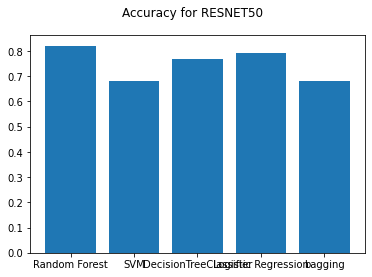

In [20]:
from tensorflow.keras.applications import ResNet50
res = ResNet50(input_shape=(SIZE,SIZE,3), include_top=False, weights="imagenet")

for layer in res.layers:
	layer.trainable = False
feature_extractor3=res.predict(x_train)
features3 = feature_extractor3.reshape(feature_extractor3.shape[0], -1)
X_for_RF3 = features3
X_test_feature3 = res.predict(x_test)
X_test_features3 = X_test_feature3.reshape(X_test_feature3.shape[0], -1)

from sklearn.ensemble import RandomForestClassifier
RF_model3 = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model3.fit(X_for_RF3, y_train)
prediction_RF3 = RF_model3.predict(X_test_features3)

print("For resnet50 model:")
from sklearn import metrics
acc=metrics.accuracy_score(test_labels_encoded, prediction_RF3)
print ("Accuracy for rf= ", acc)
l=[]
l.append(acc)

from sklearn import svm
clf = svm.SVC()
clf.fit(X_for_RF3, y_train)
prediction_svm3 = clf.predict(X_test_features3)
acc1=metrics.accuracy_score(test_labels_encoded, prediction_svm3)
print ("Accuracy for svm= ", acc1)
l.append(acc1)


from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
clf.fit(X_for_RF3, y_train)
prediction_dt3 = clf.predict(X_test_features3)
acc2=metrics.accuracy_score(test_labels_encoded, prediction_dt3)
print ("Accuracy for dt= ", acc)
l.append(acc2)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=1000)
clf.fit(X_for_RF3, y_train)
prediction_lr3=clf.predict(X_test_features3)
acc3=metrics.accuracy_score(test_labels_encoded, prediction_lr3)
print ("Accuracy for lr= ", acc3)
l.append(acc3)

from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10, random_state=0)
clf.fit(X_for_RF3, y_train)
prediction_bc3=clf.predict(X_test_features3)
acc4=metrics.accuracy_score(test_labels_encoded, prediction_bc3)
print ("Accuracy for bc= ", acc4)
l.append(acc4)

names = ['Random Forest','SVM','DecisionTreeClassifier','Logistic Regression','bagging']
plt.bar(names,l)
plt.suptitle('Accuracy for RESNET50')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded, prediction_RF3))
print(classification_report(test_labels_encoded, prediction_svm3))
print(classification_report(test_labels_encoded, prediction_dt3))
print(classification_report(test_labels_encoded, prediction_lr3))
print(classification_report(test_labels_encoded, prediction_bc3))

80142336/80134624 [==============================] - 0s 0us/step
Accuracy =  0.8731343283582089
Accuracy =  0.7238805970149254
Accuracy =  0.8731343283582089
Accuracy =  0.8880597014925373
Accuracy =  0.7164179104477612


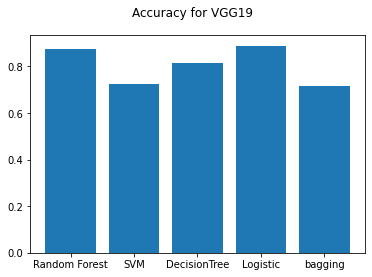

In [13]:
from tensorflow.keras.applications import VGG19
vgg = VGG19(input_shape=(SIZE,SIZE,3), include_top=False, weights="imagenet")

for layer in vgg.layers:
	layer.trainable = False
feature_extractor4=vgg.predict(x_train)
features4 = feature_extractor4.reshape(feature_extractor4.shape[0], -1)
X_for_RF4 = features4
X_test_feature4 = vgg.predict(x_test)
X_test_features4 = X_test_feature4.reshape(X_test_feature4.shape[0], -1)

from sklearn.ensemble import RandomForestClassifier
RF_model4 = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model4.fit(X_for_RF4, y_train)
prediction_RF4 = RF_model4.predict(X_test_features4)

print("For VGG19 model:")
from sklearn import metrics
acc=metrics.accuracy_score(test_labels_encoded, prediction_RF4)
print ("Accuracy for rf= ", acc)
l=[]
l.append(acc)

from sklearn import svm
clf = svm.SVC()
clf.fit(X_for_RF4, y_train)
prediction_svm4 = clf.predict(X_test_features4)
acc1=metrics.accuracy_score(test_labels_encoded, prediction_svm4)
print ("Accuracy for svm = ", acc1)
l.append(acc1)


from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
clf.fit(X_for_RF4, y_train)
prediction_dt4 = clf.predict(X_test_features4)
acc2=metrics.accuracy_score(test_labels_encoded, prediction_dt4)
print ("Accuracy for dt= ", acc)
l.append(acc2)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=500)
clf.fit(X_for_RF4, y_train)
prediction_lr4=clf.predict(X_test_features4)
acc3=metrics.accuracy_score(test_labels_encoded, prediction_lr4)
print ("Accuracy for lr= ", acc3)
l.append(acc3)

from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10, random_state=0)
clf.fit(X_for_RF4, y_train)
prediction_bc4=clf.predict(X_test_features4)
acc4=metrics.accuracy_score(test_labels_encoded, prediction_bc4)
print ("Accuracy for bc= ", acc4)
l.append(acc4)

names = ['Random Forest','SVM','DecisionTree','Logistic','bagging']
plt.bar(names,l)
plt.suptitle('Accuracy for VGG19')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded, prediction_RF4))
print(classification_report(test_labels_encoded, prediction_svm4))
print(classification_report(test_labels_encoded, prediction_dt4))
print(classification_report(test_labels_encoded, prediction_lr4))
print(classification_report(test_labels_encoded, prediction_bc4))

83689472/83683744 [==============================] - 0s 0us/step
Accuracy =  0.9626865671641791
Accuracy =  0.9626865671641791
Accuracy =  0.9626865671641791
Accuracy =  0.9701492537313433
Accuracy =  0.9701492537313433


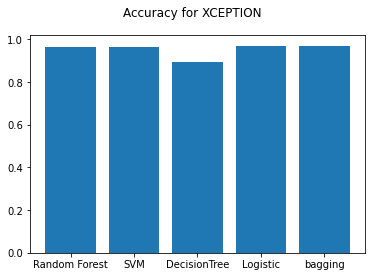

In [14]:
from tensorflow.keras.applications import Xception
xc = Xception(input_shape=(SIZE,SIZE,3), include_top=False, weights="imagenet")

for layer in xc.layers:
	layer.trainable = False
feature_extractor5=xc.predict(x_train)
features5 = feature_extractor5.reshape(feature_extractor5.shape[0], -1)
X_for_RF5 = features5
X_test_feature5 = xc.predict(x_test)
X_test_features5 = X_test_feature5.reshape(X_test_feature5.shape[0], -1)

from sklearn.ensemble import RandomForestClassifier
RF_model5 = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model5.fit(X_for_RF5, y_train)
prediction_RF5 = RF_model5.predict(X_test_features5)

print("For XCEPTION model:")
from sklearn import metrics
acc=metrics.accuracy_score(test_labels_encoded, prediction_RF5)
print ("Accuracy for rf = ", acc)
l=[]
l.append(acc)

from sklearn import svm
clf = svm.SVC()
clf.fit(X_for_RF5, y_train)
prediction_svm5 = clf.predict(X_test_features5)
acc1=metrics.accuracy_score(test_labels_encoded, prediction_svm5)
print ("Accuracy for svm= ", acc1)
l.append(acc1)


from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
clf.fit(X_for_RF5, y_train)
prediction_dt5 = clf.predict(X_test_features5)
acc2=metrics.accuracy_score(test_labels_encoded, prediction_dt5)
print ("Accuracy for dt= ", acc)
l.append(acc2)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=500)
clf.fit(X_for_RF5, y_train)
prediction_lr5=clf.predict(X_test_features5)
acc3=metrics.accuracy_score(test_labels_encoded, prediction_lr5)
print ("Accuracy for lr= ", acc3)
l.append(acc3)

from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10, random_state=0)
clf.fit(X_for_RF5, y_train)
prediction_bc5=clf.predict(X_test_features5)
acc4=metrics.accuracy_score(test_labels_encoded, prediction_bc5)
print ("Accuracy for bc= ", acc4)
l.append(acc4)

names = ['Random Forest','SVM','DecisionTree','Logistic','bagging']
plt.bar(names,l)
plt.suptitle('Accuracy for XCEPTION')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded, prediction_RF5))
print(classification_report(test_labels_encoded, prediction_svm5))
print(classification_report(test_labels_encoded, prediction_dt5))
print(classification_report(test_labels_encoded, prediction_lr5))
print(classification_report(test_labels_encoded, prediction_bc5))

Accuracy =  0.9626865671641791
Accuracy =  0.9477611940298507
Accuracy =  0.9626865671641791
Accuracy =  0.9552238805970149
Accuracy =  0.9626865671641791


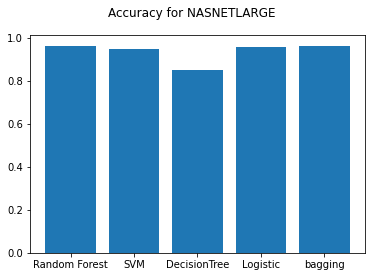

In [17]:
from tensorflow.keras.applications import NASNetLarge
nas = NASNetLarge(input_shape=(331,331,3), include_top=False, weights="imagenet")

for layer in nas.layers:
	layer.trainable = False
feature_extractor6=nas.predict(x_train)
features6 = feature_extractor6.reshape(feature_extractor6.shape[0], -1)
X_for_RF6 = features6
X_test_feature6 = nas.predict(x_test)
X_test_features6 = X_test_feature6.reshape(X_test_feature6.shape[0], -1)

from sklearn.ensemble import RandomForestClassifier
RF_model6 = RandomForestClassifier(n_estimators = 50, random_state = 42)
RF_model6.fit(X_for_RF6, y_train)
prediction_RF6 = RF_model6.predict(X_test_features6)

print("For NASNETLARGE model:")
from sklearn import metrics
acc=metrics.accuracy_score(test_labels_encoded, prediction_RF6)
print ("Accuracy for rf = ", acc)
l=[]
l.append(acc)

from sklearn import svm
clf = svm.SVC()
clf.fit(X_for_RF6, y_train)
prediction_svm6 = clf.predict(X_test_features6)
acc1=metrics.accuracy_score(test_labels_encoded, prediction_svm6)
print ("Accuracy for svm= ", acc1)
l.append(acc1)


from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
clf.fit(X_for_RF6, y_train)
prediction_dt6 = clf.predict(X_test_features6)
acc2=metrics.accuracy_score(test_labels_encoded, prediction_dt6)
print ("Accuracy for dt= ", acc)
l.append(acc2)

from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=500)
clf.fit(X_for_RF6, y_train)
prediction_lr6=clf.predict(X_test_features6)
acc3=metrics.accuracy_score(test_labels_encoded, prediction_lr6)
print ("Accuracy for lr= ", acc3)
l.append(acc3)

from sklearn.ensemble import BaggingClassifier
clf = BaggingClassifier(base_estimator=svm.SVC(),n_estimators=10, random_state=0)
clf.fit(X_for_RF6, y_train)
prediction_bc6=clf.predict(X_test_features6)
acc4=metrics.accuracy_score(test_labels_encoded, prediction_bc6)
print ("Accuracy for bc= ", acc4)
l.append(acc4)

names = ['Random Forest','SVM','DecisionTree','Logistic','bagging']
plt.bar(names,l)
plt.suptitle('Accuracy for NASNETLARGE')
plt.show()

from sklearn.metrics import classification_report
print(classification_report(test_labels_encoded, prediction_RF6))
print(classification_report(test_labels_encoded, prediction_svm6))
print(classification_report(test_labels_encoded, prediction_dt6))
print(classification_report(test_labels_encoded, prediction_lr6))
print(classification_report(test_labels_encoded, prediction_bc6))